In [57]:
#Preprocessing and Visualisation
import pandas as pd 
import numpy as np
import seaborn as sns
import re 
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly
import plotly.express as px

#Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
import time
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [11]:
#Extracting the names of the columns from the dataset description with regex
file =open("spambase.names","r")
txt = file.read()
names = re.findall("\n(\S*):", txt)

#Adding the last column which is the target (spam or not)
names.append("spam")
names

['word_freq_make',
 'word_freq_address',
 'word_freq_all',
 'word_freq_3d',
 'word_freq_our',
 'word_freq_over',
 'word_freq_remove',
 'word_freq_internet',
 'word_freq_order',
 'word_freq_mail',
 'word_freq_receive',
 'word_freq_will',
 'word_freq_people',
 'word_freq_report',
 'word_freq_addresses',
 'word_freq_free',
 'word_freq_business',
 'word_freq_email',
 'word_freq_you',
 'word_freq_credit',
 'word_freq_your',
 'word_freq_font',
 'word_freq_000',
 'word_freq_money',
 'word_freq_hp',
 'word_freq_hpl',
 'word_freq_george',
 'word_freq_650',
 'word_freq_lab',
 'word_freq_labs',
 'word_freq_telnet',
 'word_freq_857',
 'word_freq_data',
 'word_freq_415',
 'word_freq_85',
 'word_freq_technology',
 'word_freq_1999',
 'word_freq_parts',
 'word_freq_pm',
 'word_freq_direct',
 'word_freq_cs',
 'word_freq_meeting',
 'word_freq_original',
 'word_freq_project',
 'word_freq_re',
 'word_freq_edu',
 'word_freq_table',
 'word_freq_conference',
 'char_freq_;',
 'char_freq_(',
 'char_freq_[',
 '

In [12]:
Data= pd.read_csv("spambase.data", sep=",", names = names)
df = pd.DataFrame(Data)
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [13]:
# According to the spambase.DOCUMENTATION we should have 4601 instances
print(f"Number of instances = 4601 :",df.shape[0] == 4601)

#Where 1813 of them are spam
print(f"Number of spam instances = 1813 :",df[df.spam == 1].shape[0] == 1813)

#Number of Attributes: 58
print(f"Number of Attributes: 58 :",df.shape[1] == 58)

Number of instances = 4601 : True
Number of spam instances = 1813 : True
Number of Attributes: 58 : True


# Data PreProcessing

In [14]:
df.shape
#We have 4601 rows and 58 columns

(4601, 58)

In [15]:
df.mean()
#A lot of values are near 0

word_freq_make                  0.104553
word_freq_address               0.213015
word_freq_all                   0.280656
word_freq_3d                    0.065425
word_freq_our                   0.312223
word_freq_over                  0.095901
word_freq_remove                0.114208
word_freq_internet              0.105295
word_freq_order                 0.090067
word_freq_mail                  0.239413
word_freq_receive               0.059824
word_freq_will                  0.541702
word_freq_people                0.093930
word_freq_report                0.058626
word_freq_addresses             0.049205
word_freq_free                  0.248848
word_freq_business              0.142586
word_freq_email                 0.184745
word_freq_you                   1.662100
word_freq_credit                0.085577
word_freq_your                  0.809761
word_freq_font                  0.121202
word_freq_000                   0.101645
word_freq_money                 0.094269
word_freq_hp    

In [16]:
df.describe()
#General information about the dataset, some max frequencies are very high like 3d with 42%

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [17]:
df.dtypes
# Mainly floates with 3 int

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

### First thought 

<AxesSubplot:title={'center':'Check of NaN value in the dataset'}>

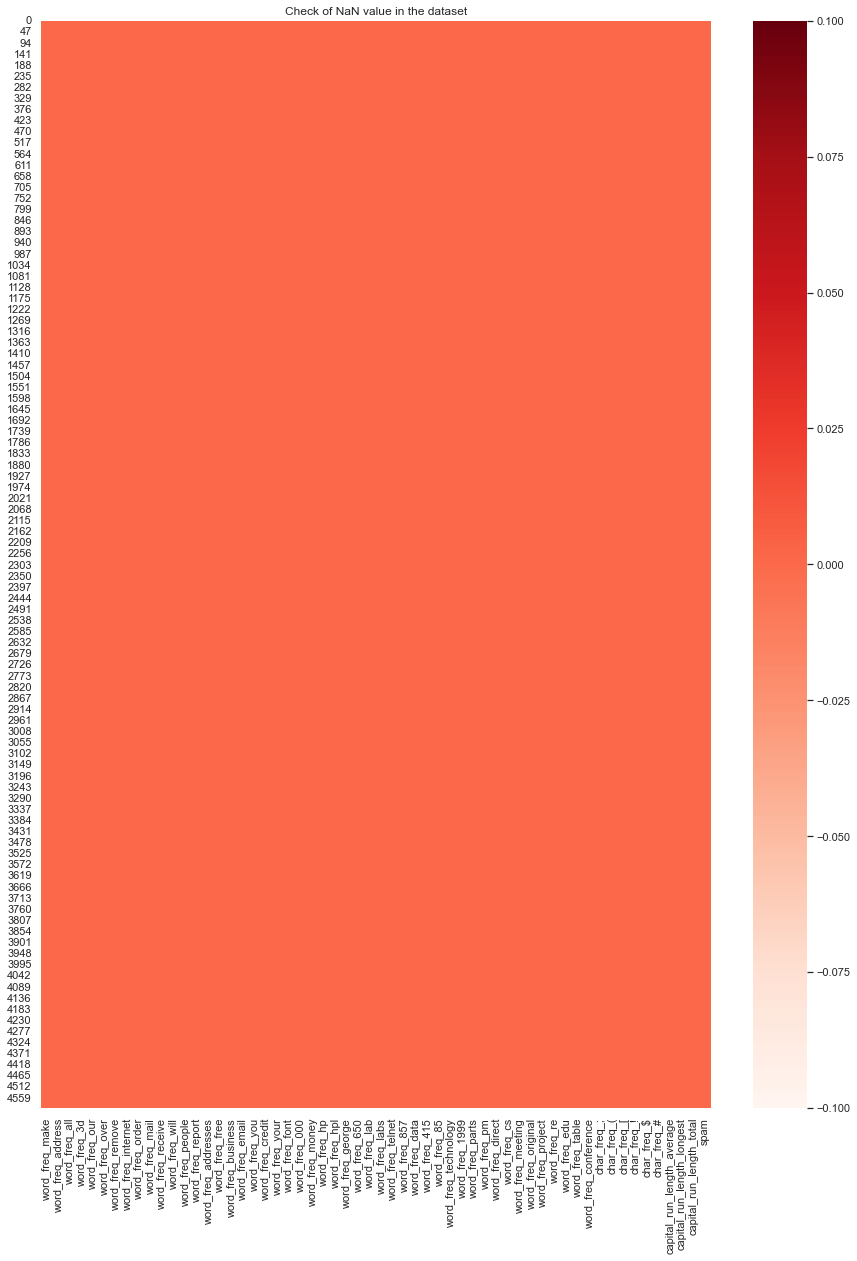

In [18]:
fig=plt.figure(figsize=(15,20))
plt.title('Check of NaN value in the dataset')
sns.heatmap(df.isnull(),cmap='Reds')
# We can see there no null values in the dataset

In [19]:
#Columns representing the frequency of the word "you" in an e-mail
df.word_freq_you

0       1.93
1       3.47
2       1.36
3       3.18
4       3.18
        ... 
4596    0.62
4597    6.00
4598    1.50
4599    1.93
4600    4.60
Name: word_freq_you, Length: 4601, dtype: float64

In [20]:
#If Spam=1 the e-mail is considered as a spam.
df_spam = df[df.spam == 1]
df_non_spam = df[df.spam == 0]
df_spam

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.000,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.000,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.000,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.000,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1808,0.00,0.00,0.00,0.0,0.00,0.23,0.00,0.00,0.00,0.00,...,0.077,0.038,0.000,0.000,0.000,0.038,2.600,42,182,1
1809,0.39,0.00,0.00,0.0,0.00,0.39,0.79,0.00,0.00,0.39,...,0.000,0.064,0.000,0.640,0.192,0.000,2.740,13,74,1
1810,0.00,0.00,0.77,0.0,0.38,0.38,0.38,0.00,0.00,0.77,...,0.063,0.127,0.255,0.510,0.000,0.000,3.685,62,258,1
1811,0.00,0.00,0.00,0.0,0.53,0.00,0.53,0.00,0.53,0.00,...,0.000,0.000,0.000,0.082,0.000,0.000,4.391,66,101,1


In [21]:
#Every columns in df_freq represent the frequency a word is appearing in an e-mail
non_freq_col = df.columns[-4:]
df_freq = df.drop(non_freq_col,axis=1)
non_freq_col

Index(['capital_run_length_average', 'capital_run_length_longest',
       'capital_run_length_total', 'spam'],
      dtype='object')

word_freq_you    1.6621
dtype: float64


<AxesSubplot:>

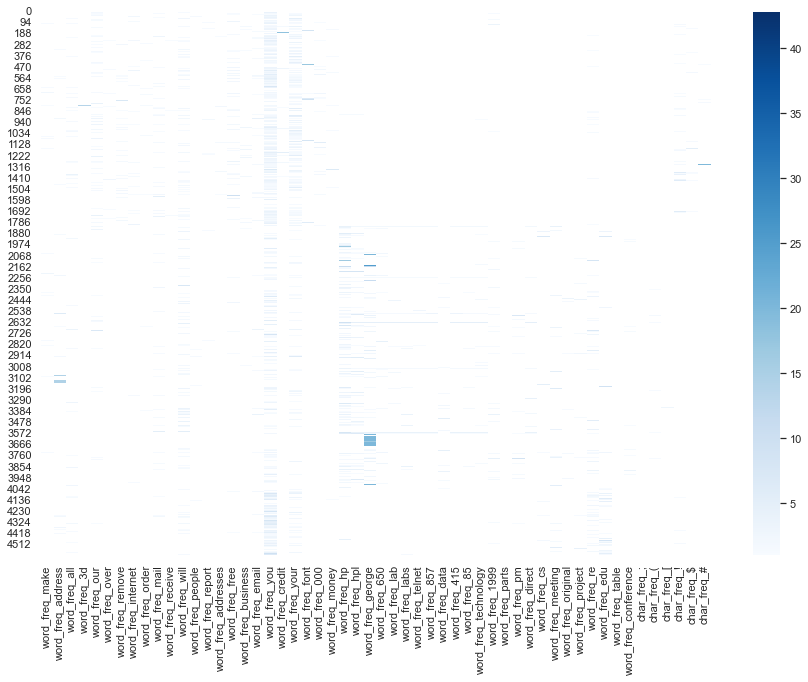

In [22]:
# Visualisation of the frequencies for each row
print(df_freq.mean()[df_freq.mean() > 1])
fig_freq=plt.figure(figsize=(15,10))
sns.heatmap(df_freq[df_freq > 1],cmap="Blues")

## Data Visualisation

In [23]:
sns.set_theme(style="whitegrid")
# we set this team for clearer visualisations

### Correlation Matrix

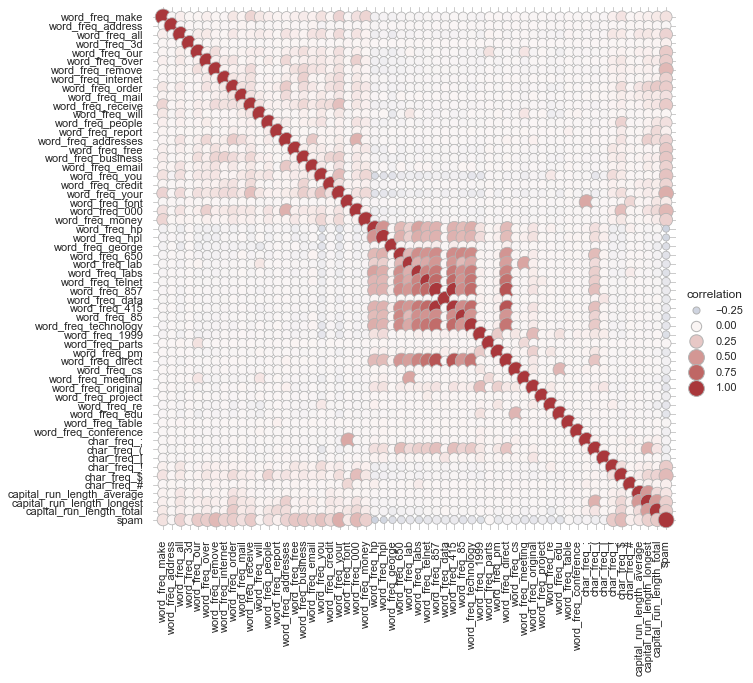

In [24]:
corr_mat = df.corr().stack().reset_index(name="correlation")
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .5),
)
# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")

In [25]:


corr_spam=corr_mat[corr_mat['level_0']=='spam'].sort_values(by='correlation', ascending=False)
corr_spam=corr_spam[corr_spam['correlation']!=1]
#corr_spam.style.background_gradient(cmap='GnBu')

<AxesSubplot:title={'center':'Correlation Coefficent of Spam and others variables'}, ylabel='level_1'>

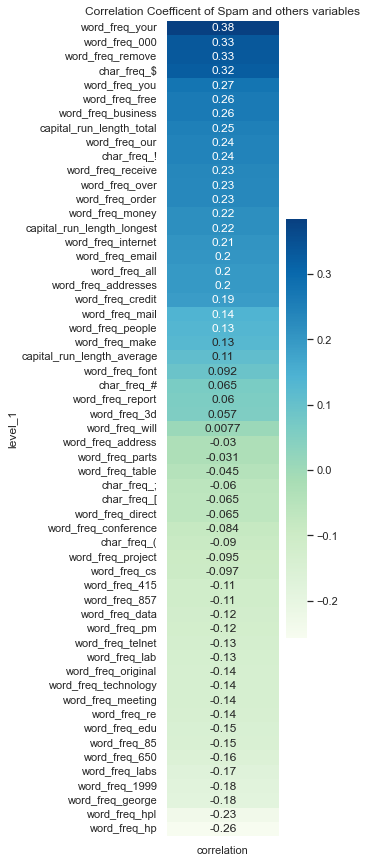

In [26]:
# Visualistion of correlation between the column spam and the frequencies

plt.figure(figsize=(2.5,15))
plt.title('Correlation Coefficent of Spam and others variables')
sns.heatmap(corr_spam.drop('level_0',axis='columns').set_index('level_1'),cmap='GnBu',annot=True)

In [28]:
# Visualisation of the number of spam in the dataset with its frequencie

fig=plt.figure()
pie=px.pie(df.spam.value_counts(),
           values=df.spam.value_counts(),
           names=["Non Spam","Spam"],
           title='Proportion of spams')
pie.update_traces(textposition='inside', textinfo='percent+label')
#fig.savefig('Proportion_figure.png')

<Figure size 432x288 with 0 Axes>

In [29]:
#Function  which return the word used for better visualisation
def word(a):
    if('word_freq_' in a ) :
        return a.split('word_freq_',1 )[1]
    elif('char_freq_' in a ) :
        return a.split('char_freq_',1)[1]
    else :
        return a

#Function used to plot the barplot 
def freq_plot(data,x,y,title,x_label,labels,fig_size=None,**kwargs):
    if fig_size!=None:
        fig=plt.figure(figsize=fig_size)
    else :
      pass
    fig_freq=sns.barplot(data=data,x=x,y=y,**kwargs)
    plt.title(title)
    if labels==None:
        fig_freq.set_xticklabels(fig_freq.get_xticklabels(), rotation=30, ha="right")
    else :
        fig_freq.set_xticklabels(labels,rotation=30,ha="right")
    fig_freq.set_ylabel('Frequency')
    fig_freq.set_xlabel(x_label)


In [30]:
table_moy=df.groupby('spam').mean()
words_freq=table_moy[table_moy.columns[:-9]].stack().reset_index()
char_freq=table_moy[table_moy.columns[-9:-3]].stack().reset_index()
capital_freq=table_moy[table_moy.columns[-3:]].stack().reset_index()
words_freq['spam']=words_freq['spam'].apply(lambda x: 'Spam' if x==1 else 'Not spam')
char_freq['spam']=char_freq['spam'].apply(lambda x: 'Spam' if x==1 else 'Not spam')
capital_freq['spam']=capital_freq['spam'].apply(lambda x: 'Spam' if x==1 else 'Not spam')
words=[word(i) for i in table_moy.columns]

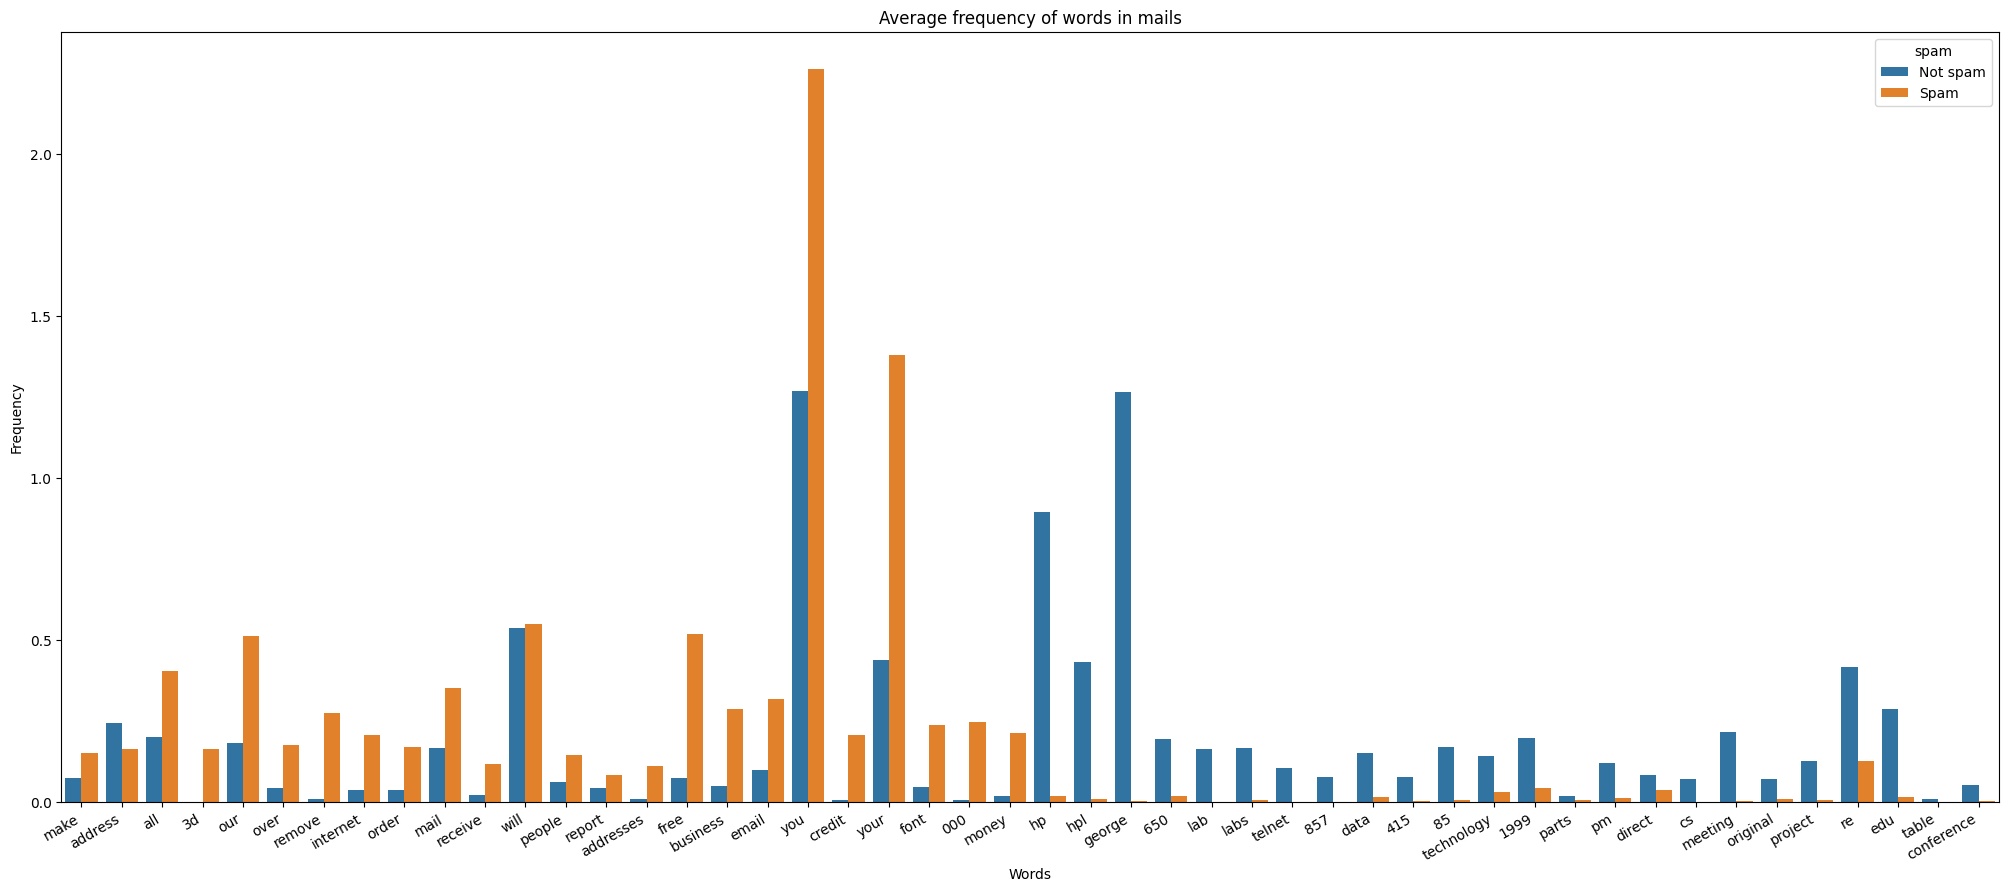

In [27]:
plot_freq_words=freq_plot(words_freq,y=0,x='level_1',title='Average frequency of words in mails',labels=words[:-9],x_label='Words',fig_size=(25,10),hue='spam')


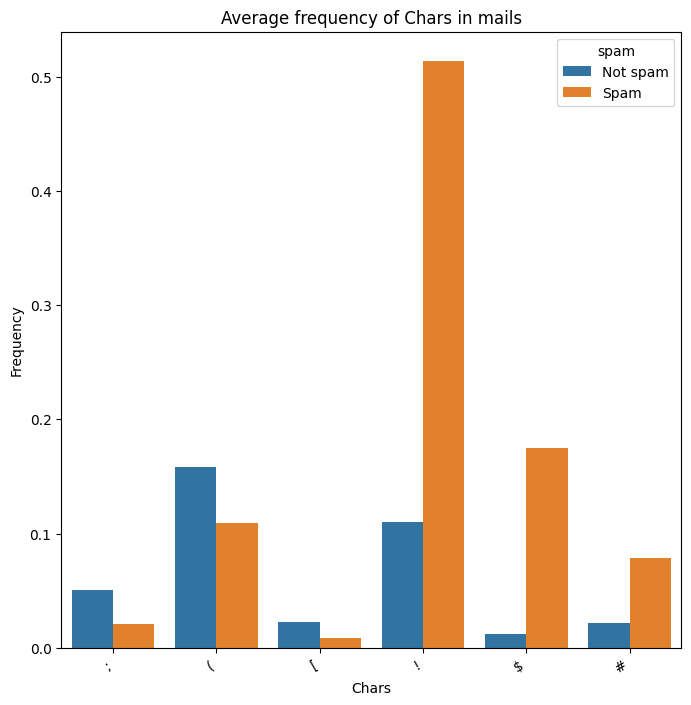

In [28]:
plot_freq_chars=freq_plot(char_freq,y=0,x='level_1',title='Average frequency of Chars in mails',labels=words[-9:-3],x_label='Chars',fig_size=(8,8),hue='spam')

Text(0.5, 1.0, "Predominance of words/chars' frequencies in spam and non spam mails")

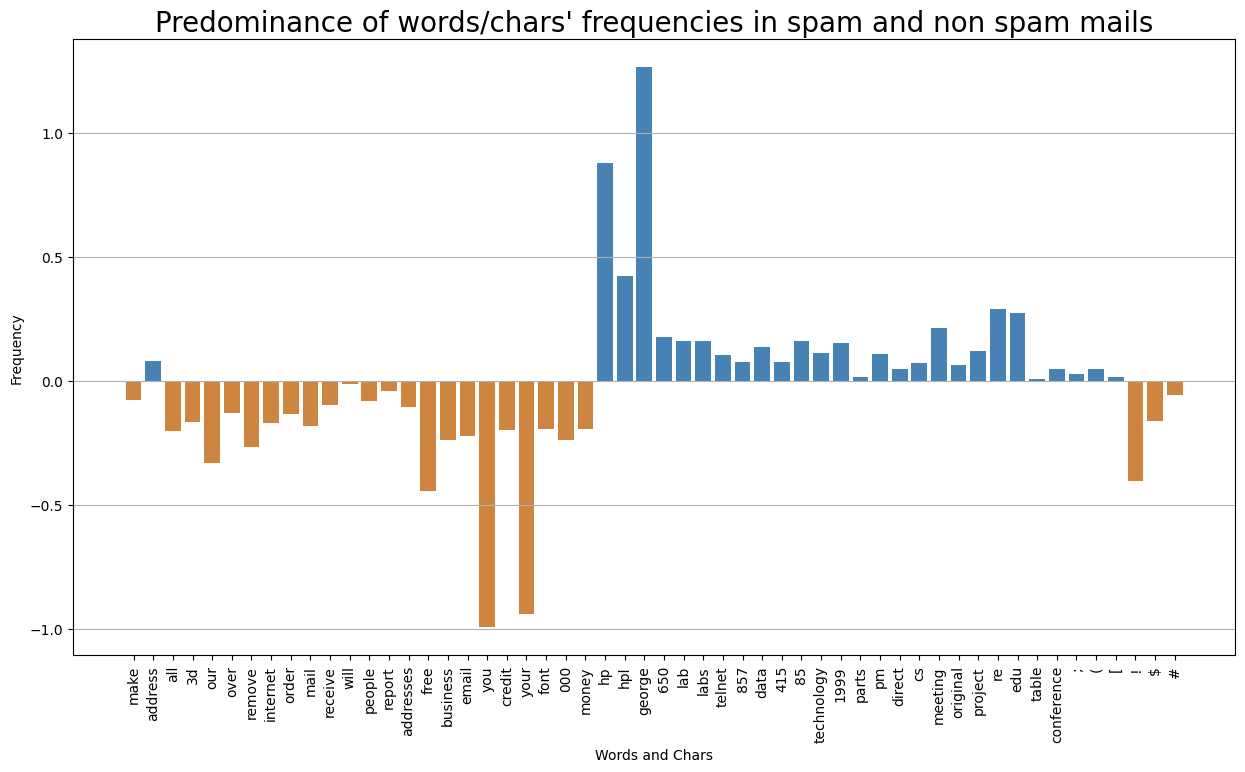

In [29]:
diff=table_moy.iloc[0]-table_moy.iloc[1]
#0 not a spam :  frequence => positif 
#1 is a spam : frequence =>negative

col=[True if i>0 else False for i in diff]
diff=diff.to_frame()
diff['color']=col
diff['color']=diff['color']
diff.columns=['Values','colors']
diff=diff[:-3]
#diff=diff.reset_index()
diff_labels=[word(i) for i in diff.index]
spam=['Spam','Not Spam']

#Plot of the difference of words/chars' frequencies between spam and non spam mails
fig=plt.figure(figsize=(15,8))
plt.grid(axis='y')
plot_diff=plt.bar(x=diff.index,height=diff.Values,color=diff.colors.map({False :'peru' , True: 'steelblue'}))
plt.xticks(diff.index,diff_labels,rotation=90)
plt.xlabel('Words and Chars')
plt.ylabel('Frequency')
plt.title("Predominance of words/chars' frequencies in spam and non spam mails",fontsize=20)


Text(0, 0.5, 'Averange length run in mails')

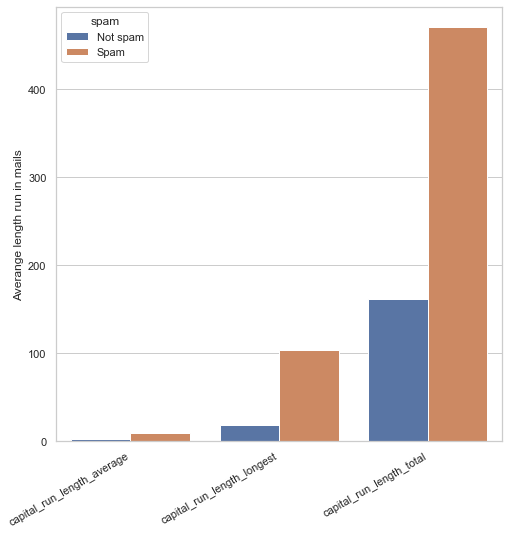

In [32]:
plot_length_run=freq_plot(capital_freq,y=0,x='level_1',title='',labels=words[-3:],x_label='',fig_size=(8,8),hue='spam')
plt.ylabel('Averange length run in mails')

In [33]:
lab=list(map(word,df_spam.drop('spam',axis='columns').mean().sort_values(ascending=False)[3:][:10].index))
lab_bis=list(map(word,df_non_spam.mean().sort_values(ascending=False)[3:][:10].index))
top_10_spam=(df_spam.drop('spam',axis='columns').mean().sort_values(ascending=False)[3:][:10])
top_10_non_spam=(df_non_spam.drop('spam',axis='columns').mean().sort_values(ascending=False)[3:][:10])

Text(0.5, 1.0, 'Non spam')

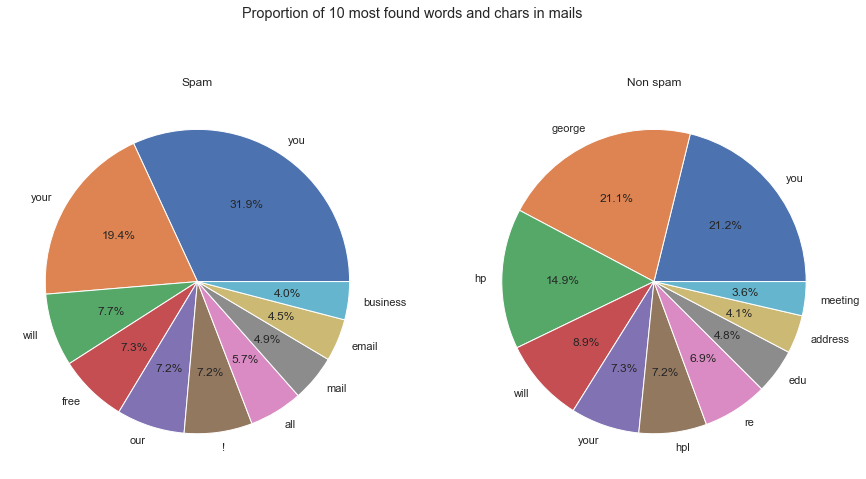

In [34]:
fig= plt.subplots( figsize=(15,8))
plt.suptitle('Proportion of 10 most found words and chars in mails')
ax1 = plt.subplot2grid((1,2),(0,0))
plt.pie(top_10_spam,labels=lab,autopct='%.1f%%')
plt.title('Spam')
ax2 = plt.subplot2grid((1,2),(0,1))
plt.pie(top_10_non_spam,labels=lab_bis,autopct='%.1f%%')
plt.title('Non spam')

Text(0, 0.5, '')

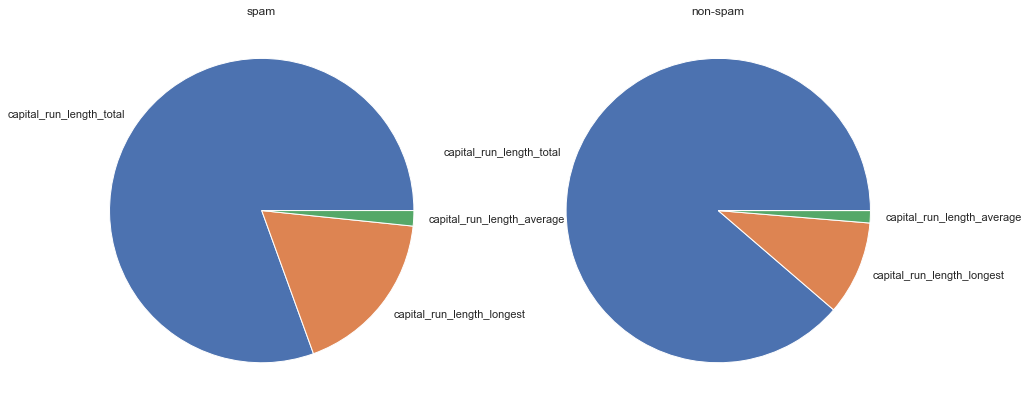

In [35]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(15,8))
ax1=df_spam[non_freq_col.drop("spam")][:-2].mean().sort_values(ascending=False).plot.pie(ax=ax[0],title='spam')
ax1.set_ylabel("")
ax2=df_non_spam[non_freq_col][:-2].mean().sort_values(ascending=False).plot.pie(ax=ax[1],title='non-spam')
ax2.set_ylabel("")

# Modeling

In [37]:
#Splitting the dataset to training and testing sets

X = np.array(df.drop("spam",axis=1))
y = np.array(df["spam"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=123)

### Standardization

In [38]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train= scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Logistic Regression with SGD training

In [39]:
clf = SGDClassifier(loss="log", penalty="l2")
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
x_pred = clf.predict(X_train)
print('Train Accuracy: {:.2f}'.format(accuracy_score(y_train, x_pred)))
print('Test Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))


Train Accuracy: 0.93
Test Accuracy: 0.93


<AxesSubplot:title={'center':'Confusion Martix of Logistic regression SGD Classifer'}>

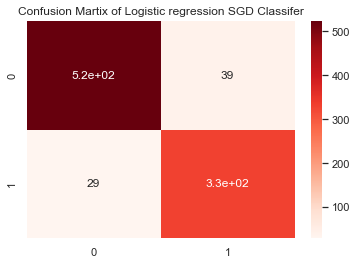

In [40]:
cm_1 = confusion_matrix(y_test,y_pred)
plt.title('Confusion Martix of Logistic regression SGD Classifer')
sns.heatmap(cm_1, annot=True,cmap='Reds')

c:\Users\presn\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

c:\Users\presn\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

c:\Users\presn\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

c:\Users\presn\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



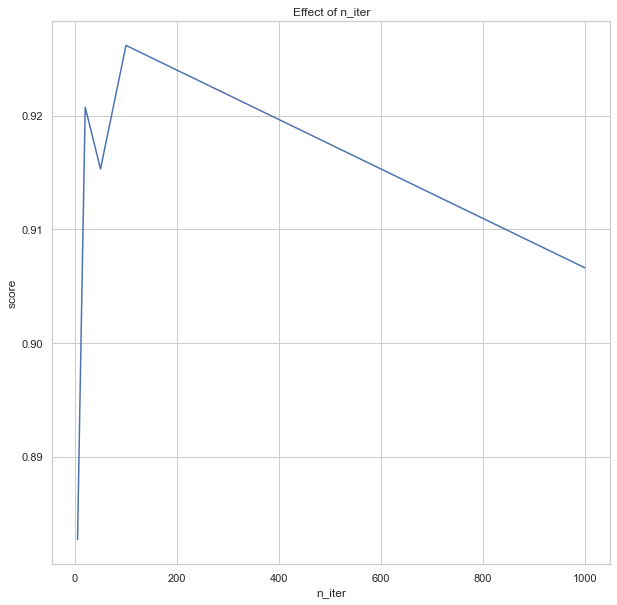

In [42]:
n_iters = [5, 10, 20, 50, 100, 1000]
#n_iters=range(1,1000,30)
scores = []
for n_iter in n_iters:
    clf = SGDClassifier(loss="log", penalty="l2", max_iter=n_iter)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))
plt.figure(figsize=(10,10))
plt.title("Effect of n_iter")
plt.xlabel("n_iter")
plt.ylabel("score")
plt.plot(n_iters, scores) 

### Linear SVM with SGD training

After Standardization

In [51]:
# STANDARDISATION, homogénéiser la forme des données collectées
clf = SGDClassifier(loss="hinge", penalty="l2")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
x_pred = clf.predict(X_train)
print('Train Accuracy: {:.2f}'.format(accuracy_score(y_train, x_pred)))
print('Test Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Train Accuracy: 0.92
Test Accuracy: 0.93


<AxesSubplot:title={'center':'Confusion Martix of Linear SVM SGD Classifer'}>

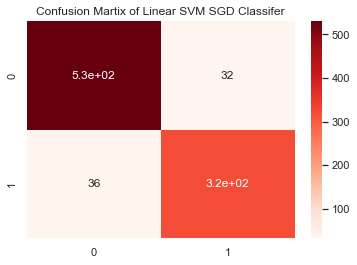

In [52]:
cm_1 = confusion_matrix(y_test,y_pred)
plt.title('Confusion Martix of Linear SVM SGD Classifer')
sns.heatmap(cm_1, annot=True,cmap='Reds')

c:\Users\presn\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

c:\Users\presn\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

c:\Users\presn\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

c:\Users\presn\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



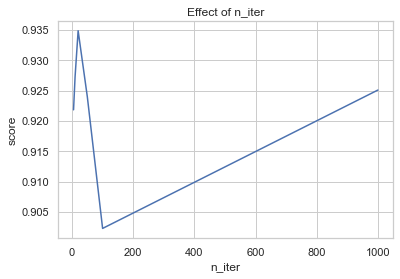

In [53]:
n_iters = [5, 10, 20, 50, 100, 1000]
scores = []
for n_iter in n_iters:
    clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=n_iter)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))
  
plt.title("Effect of n_iter")
plt.xlabel("n_iter")
plt.ylabel("score")
plt.plot(n_iters, scores)

c:\Users\guill\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning:

The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.



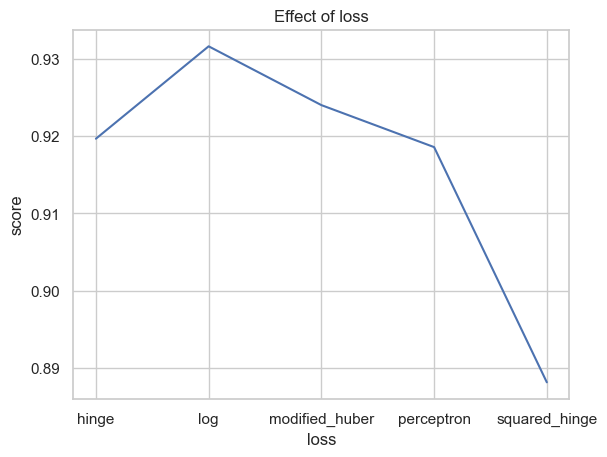

In [804]:
losses = ["hinge", "log", "modified_huber", "perceptron", "squared_hinge"]
scores = []
for loss in losses:
    clf = SGDClassifier(loss=loss, penalty="l2", max_iter=1000)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))
  
plt.title("Effect of loss")
plt.xlabel("loss")
plt.ylabel("score")
x = np.arange(len(losses))
plt.xticks(x, losses)
plt.plot(x, scores) 

##### Hinge, which stands for the use of a linear SVM, gives the best score and the use of the perceptron gives the worst value.

In [56]:
# With searchGrid we try to find the best parameters

params = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber", "perceptron"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "elasticnet", "none"],
}

clf = SGDClassifier(max_iter=1000)
grid = GridSearchCV(clf, param_grid=params, cv=10)

grid.fit(X_train, y_train)
print(grid.best_params_) 

c:\Users\presn\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

c:\Users\presn\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

c:\Users\presn\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

c:\Users\presn\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

c:\Users\presn\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning:

Maximu

{'alpha': 0.001, 'loss': 'hinge', 'penalty': 'elasticnet'}


In [806]:
grid_predictions = grid.predict(X_test) 

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, grid_predictions)))

Accuracy: 0.93


In [807]:
# count=0
# for i in range(0,len(grid_predictions)):
#     if grid_predictions[i]==y_test[i]:
#         count+=1
#     else :
#         count=count
# print("Accurate prediction :",count)
# print("Not accurate prediction :",len(grid_predictions)-count)
# print("Total :", len(grid_predictions))
# print("Accuracy",count/len(grid_predictions)*100)
#plt.scatter(grid_predictions)

Accurate prediction : 861
Not accurate prediction : 60
Total : 921
Accuracy 93.48534201954396


<AxesSubplot: title={'center': 'Confusion Martix of the best SGD Classifer model'}>

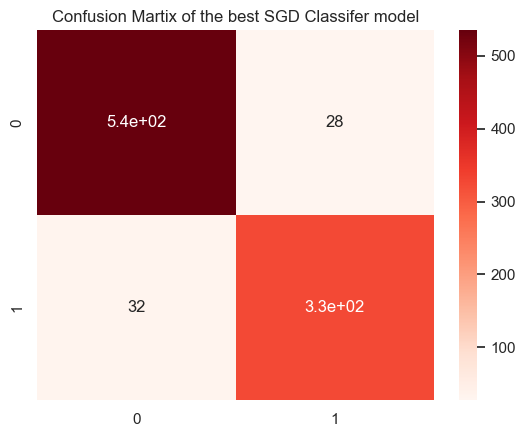

In [808]:
cm_1 = confusion_matrix(y_test,grid_predictions)
plt.title('Confusion Martix of the best SGD Classifer model')
sns.heatmap(cm_1, annot=True,cmap='Reds')

array([0], dtype=int64)

### Random Forest

In [42]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train,y_train)
pred_rf = random_forest.predict(X_test)

In [47]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test,pred_rf)))

Accuracy: 0.94


In [60]:
#n_estimators: (default 100), this parameter signifies the amount of trees in the forest.
# max_depth signifies allowed depth of individual decision trees.
# min_samples_split: (default 2) This is the minimum number of samples required for a node split.
# criterion: (default gini) Criterion is the same as in decision tree algorithm. 


n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 100, num = 20)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [1,2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]


# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 6, 11, 16, 21, 27, 32, 37, 42, 47, 53, 58, 63, 68, 73, 79, 84, 89, 94, 100, None], 'min_samples_split': [1, 2, 5], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [61]:
#parameters_RF = {"max_depth": list(range(1,20)), "criterion" : ['entropy','gini'], 'min_samples_leaf' : list(range(1,10)),"n_estimators" : range(100,1000,100)}
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = random_forest, param_distributions = random_grid,scoring='accuracy', n_iter = 150, cv = 4, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)
rf_random.best_params_

#grid_RF = GridSearchCV(estimator = random_forest, param_grid = random_grid, cv = 10, scoring = )
#grid_RF.fit(X_train,y_train)
#best_RF=grid_RF.best_params_
#print(best_RF)

Fitting 4 folds for each of 150 candidates, totalling 600 fits


c:\Users\guill\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning:


208 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\guill\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\guill\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
            ^^^^^^^^^
  File "c:\Users\guill\AppData\Local\Programs\Python\Python311\Lib\site-pa

{'n_estimators': 1600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 68,
 'bootstrap': False}

In [71]:
b=rf_random.best_params_
random_forest_best= RandomForestClassifier(n_estimators=b["n_estimators"], max_depth = b['max_depth'],max_features=b['max_features'],min_samples_leaf = b['min_samples_leaf'],min_samples_split=b['min_samples_split'],bootstrap=False,random_state=42)
random_forest_best.fit(X_train,y_train)
pred_rf_best = random_forest_best.predict(X_test)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, pred_rf_best)))


Accuracy: 0.95


<AxesSubplot: >

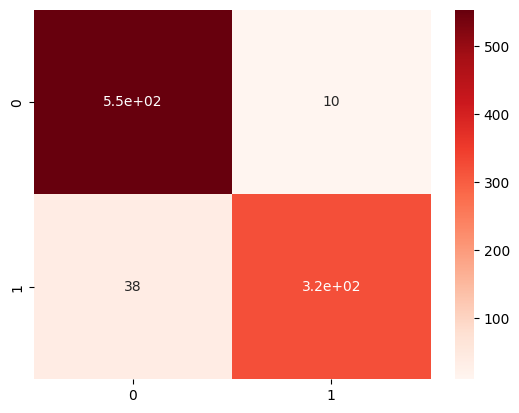

In [73]:
#Fine tuning with RandomizedSearchCV
sns.heatmap(confusion_matrix(y_test,pred_rf_best),annot=True,cmap="Reds")

In [23]:
param_grid = {
    'max_depth': list(range(1,20)),
    #'max_features':list(range(3,10,1)),
    'min_samples_leaf': [1],
    'min_samples_split': list(range(1,10,1)),
    'n_estimators': [100,400,500,700,800,900,1000]
}
# Create a based model
rf = RandomForestClassifier(random_state=42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,scoring='accuracy', 
                          cv =4, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 4 folds for each of 1197 candidates, totalling 4788 fits


c:\Users\guill\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
532 fits failed out of a total of 4788.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
532 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\guill\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\guill\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
            ^^^^^^^^^
  File "c:\Users\guill\AppData\Local\Programs\Python\Python311\Lib\site-pa

{'max_depth': 18,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 700}

In [66]:
best_RF=grid_search.best_params_

In [69]:
random_forest_best= RandomForestClassifier(n_estimators=best_RF["n_estimators"], max_depth = best_RF['max_depth'],max_features=best_RF['max_features'],min_samples_leaf = best_RF['min_samples_leaf'],min_samples_split=best_RF['min_samples_split'],random_state=42)
random_forest_best.fit(X_train,y_train)
pred_rft = random_forest_best.predict(X_test)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, pred_rf_best)))

Accuracy: 0.94


<AxesSubplot: >

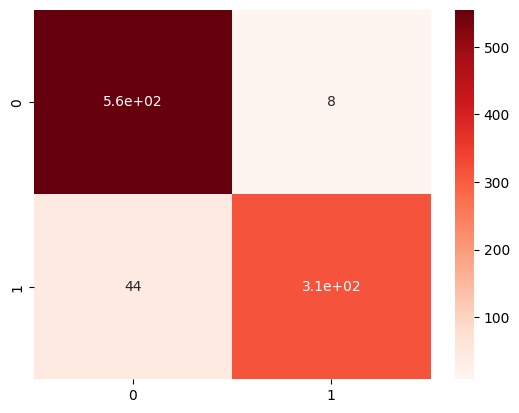

In [70]:
sns.heatmap(confusion_matrix(y_test,pred_rf),annot=True,cmap="Reds")
# Fine tuning with GridSearchCV

### KNN

In [404]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
#training
knn.fit(X_train,y_train)
knn.score(X_test,y_test)
pred_knn = knn.predict(X_test)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test,pred_knn)))

Accuracy: 0.90


In [403]:
k_range = list(range(1, 25))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid_search=grid.fit(X_train,y_train)
print(grid_search.best_params_)

Fitting 8 folds for each of 24 candidates, totalling 192 fits
{'n_neighbors': 3}


<AxesSubplot: >

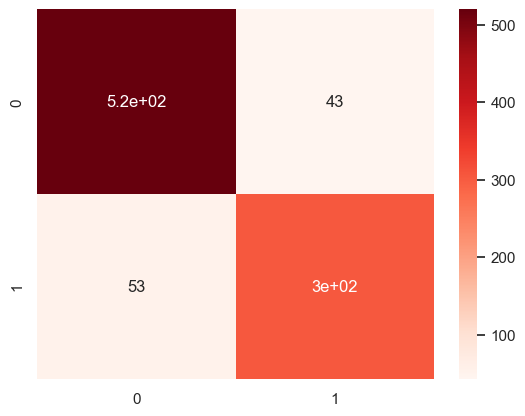

In [401]:
sns.heatmap(confusion_matrix(y_test,pred_knn),annot=True,cmap="Reds")

### Testing the model on real case data

In [67]:
CorrectMail ="""Hello, 
Can we have a meeting tomorow we need to talk about an important thing
cheers,
Patrick"""

In [68]:
Spam = (f"""It's that time of year again! Time for our huge annual Black Friday 5% off SITEWIDE sale! Our standard discounted prices plus an extra 5% off! Use coupon code EPICFIVE. Hurry, inventory is limited!
Shop Black Friday Savings! 🦃
This time of year everyone is scrambling to find the perfect gifts for their loved ones. If you're tired of feeling like you're a Christmas Grinch when it comes to gift giving, well this gift guide is sure to get you into the holiday spirit!
CardCash 2022 Gift Guide
🎄Happy Shopping!""")

In [65]:
#Function to transform a mail into a list for our models

def MailTransf(email):
    freq_words = ['make', 'address', 'all', '3d', 'our', 'over', 'remove', 'internet', 'order', 'mail', 'receive', 'will', 'people', 'report', 'addresses', 'free', 'business', 'email', 'you', 'credit', 'your', 'font', '000', 'money', 'hp', 'hpl', 'george', '650', 'lab', 'labs', 'telnet', '857', 'data', '415', '85', 'technology', '1999', 'parts', 'pm', 'direct', 'cs', 'meeting', 'original', 'project', 're', 'edu', 'table', 'conference']
    freq_caract = [';', '(', '[', '!', '$', '#']
    freq_w_list = [ 100*email.split(" ").count(x)/len(email.split(" ")) for x in freq_words]
    freq_c_list = [ 100*email.count(x)/len(email) for x in freq_caract]
    lengt_Capital = [len(x) for x in re.findall("[A-Z]+", email)]
    
    freq_w_list.extend(freq_c_list)
    freq_w_list.extend([np.mean(lengt_Capital), np.max(lengt_Capital), np.sum(lengt_Capital)])

    return [freq_w_list]

In [72]:
# For SVM model prediction 
# 0 is a non-spam, 1 is a spam
print('The SVM model predict a non-spam for the correct mail :', grid.predict(MailTransf(CorrectMail)))
print('The SVM model predict a spam for the fraudulent mail :', grid.predict(MailTransf(Spam)))

The model predict a non-spam for the correct mail : [0]
The model predict a spam for the fraudulent mail : [1]


In [73]:
# For the random the random forest
print('The Random Forest model predict a non-spam for the correct mail :', random_forest_best.predict(MailTransf(CorrectMail)))
print('The Random Forest model predict a spam for the fraudulent mail :', random_forest_best.predict(MailTransf(Spam)))

NameError: name 'random_forest_best' is not defined